In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2016 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Find Natural Neighbors Verification

Finding natural neighbors in a triangulation

A triangle is a natural neighbor of a point if that point is within a circumscribed
circle ("circumcircle") containing the triangle.

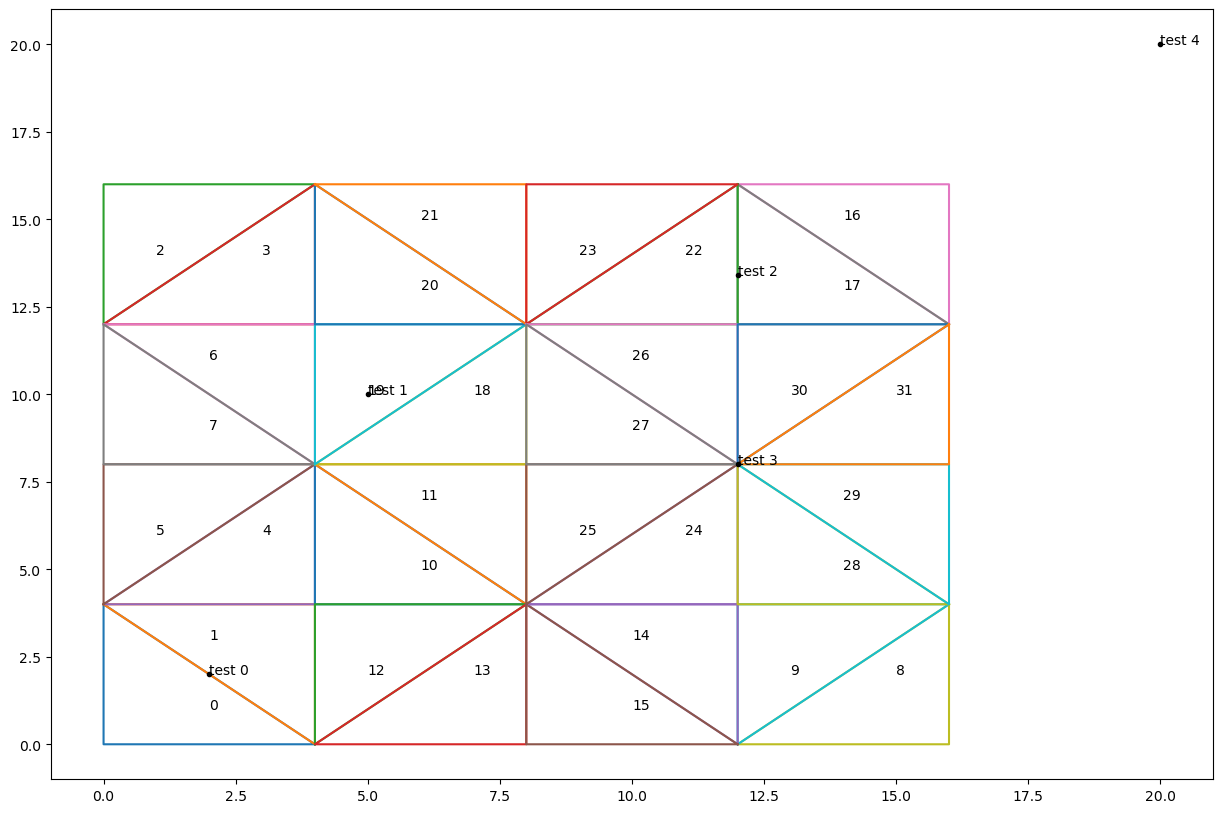

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay

from metpy.interpolate.geometry import circumcircle_radius, find_natural_neighbors

# Create test observations, test points, and plot the triangulation and points.
gx, gy = np.meshgrid(np.arange(0, 20, 4), np.arange(0, 20, 4))
pts = np.vstack([gx.ravel(), gy.ravel()]).T
tri = Delaunay(pts)

fig, ax = plt.subplots(figsize=(15, 10))
for i, inds in enumerate(tri.simplices):
    pts = tri.points[inds]
    x, y = np.vstack((pts, pts[0])).T
    ax.plot(x, y)
    ax.annotate(i, xy=(np.mean(x), np.mean(y)))

test_points = np.array([[2, 2], [5, 10], [12, 13.4], [12, 8], [20, 20]])

for i, (x, y) in enumerate(test_points):
    ax.plot(x, y, 'k.', markersize=6)
    ax.annotate('test ' + str(i), xy=(x, y))

Since finding natural neighbors already calculates circumcenters, return
that information for later use.

The key of the neighbors dictionary refers to the test point index, and the list of integers
are the triangles that are natural neighbors of that particular test point.

Since point 4 is far away from the triangulation, it has no natural neighbors.
Point 3 is at the confluence of several triangles so it has many natural neighbors.

In [4]:
neighbors, circumcenters = find_natural_neighbors(tri, test_points)
print(neighbors)

{0: [0, 1], 1: [18, 19], 2: [16, 17, 22, 23], 3: [24, 25, 26, 27, 28, 29, 30, 31], 4: []}


We can plot all of the triangles as well as the circles representing the circumcircles

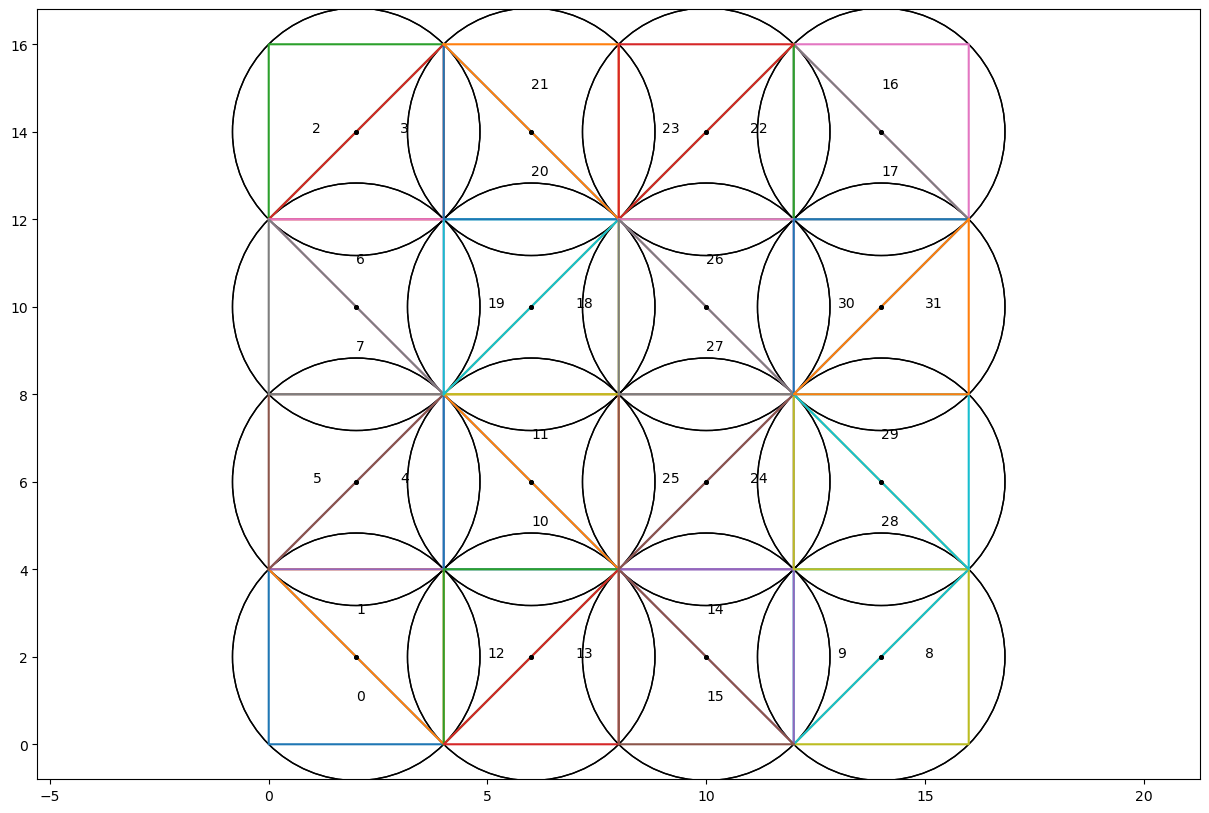

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
for i, inds in enumerate(tri.simplices):
    pts = tri.points[inds]
    x, y = np.vstack((pts, pts[0])).T
    ax.plot(x, y)
    ax.annotate(i, xy=(np.mean(x), np.mean(y)))

# Using circumcenters and calculated circumradii, plot the circumcircles
for idx, cc in enumerate(circumcenters):
    ax.plot(cc[0], cc[1], 'k.', markersize=5)
    circ = plt.Circle(cc, circumcircle_radius(*tri.points[tri.simplices[idx]]),
                      edgecolor='k', facecolor='none', transform=fig.axes[0].transData)
    ax.add_artist(circ)

ax.set_aspect('equal', 'datalim')

plt.show()